# Term Deposit Sale

### Import the datasets and libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import metrics

In [3]:
# importing data

df = pd.read_csv("bank-full.csv")
df.head()      # used to see top 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
df.dtypes        ## this would give datatype of each column

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()  #check for null Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
df.drop(['poutcome'],axis=1,inplace=True)

# dropping 'poutcome' column as 36959 values are unknown out of 45211(~82%) and this column wont provide any insight to build a model

In [11]:
#Convert X & Y variable to a categorical variable wherever relevant
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['month'] = df['month'].astype('category')
df['contact'] = df['contact'].astype('category')
df['Target'] = df['Target'].astype('category')

In [12]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
Target       category
dtype: object

In [13]:
for i in list(df.columns[df.dtypes=='category']):   # checking value counts of all category type columns
    print(df[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

no     39922
yes     5289
Name: Target, dtype: int64



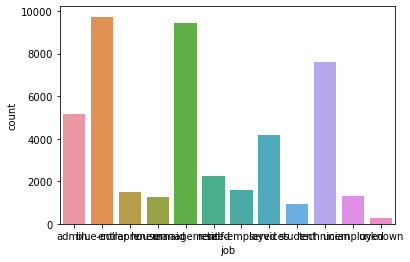

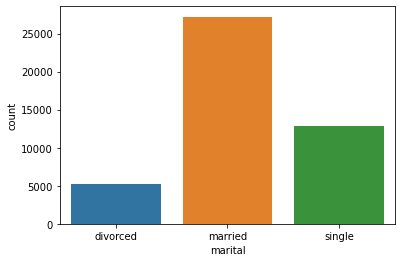

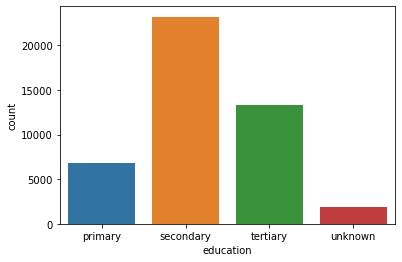

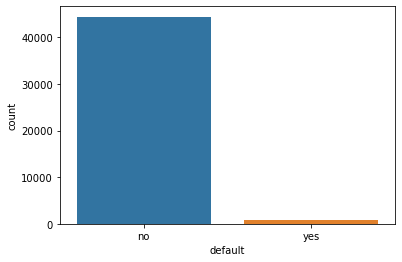

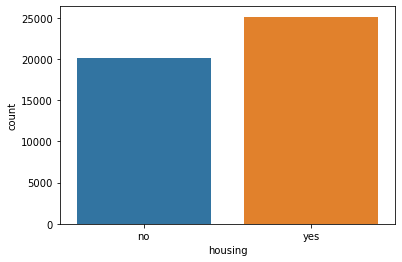

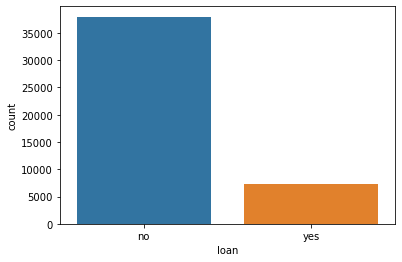

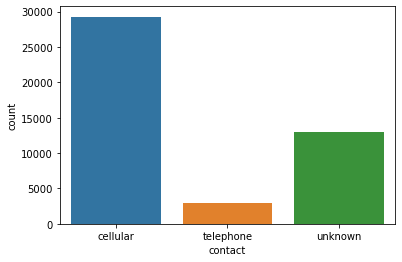

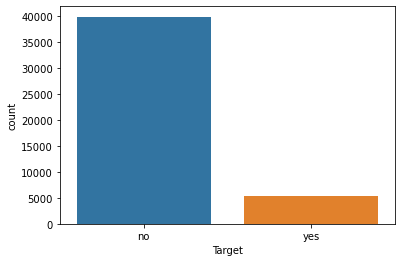

In [14]:
for i in ['job','marital','education','default','housing','loan','contact','Target']:
     sns.countplot(df[i])
     plt.show()

* job is distribured across various types
* more than 60% of customers are marries
* more than 50% of customers have secondary education
* more than 98% of customers are non-default 
* 55% customers have housing loan
* ~65% customers have cellular contact communication type
* cutomers contact across months are spread and is highest in may
* customers who has subscribed for term deposit is only ~12%

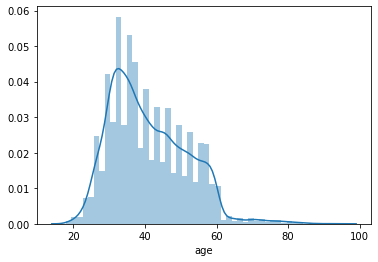

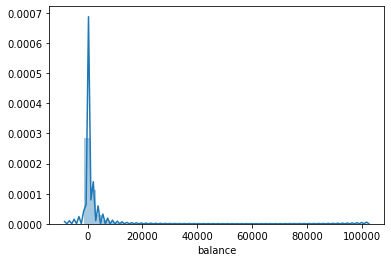

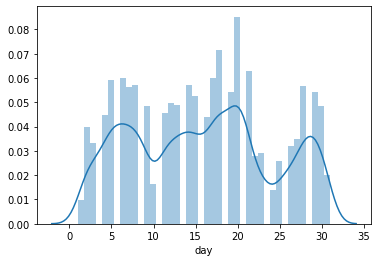

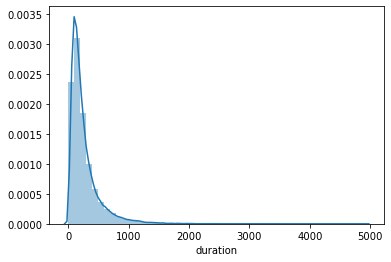

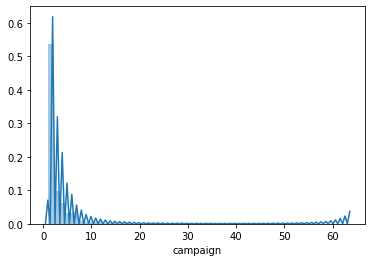

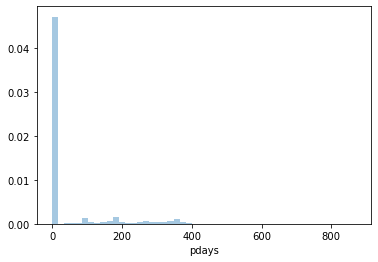

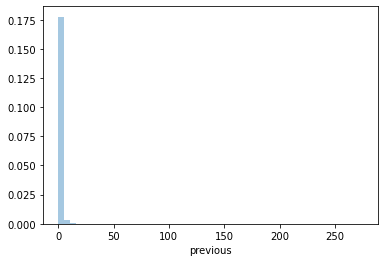

In [15]:
# distplot for continous columns
for i in ['age','balance','day', 'duration', 'campaign','pdays', 'previous']:
    sns.distplot(df[i])
    plt.show()

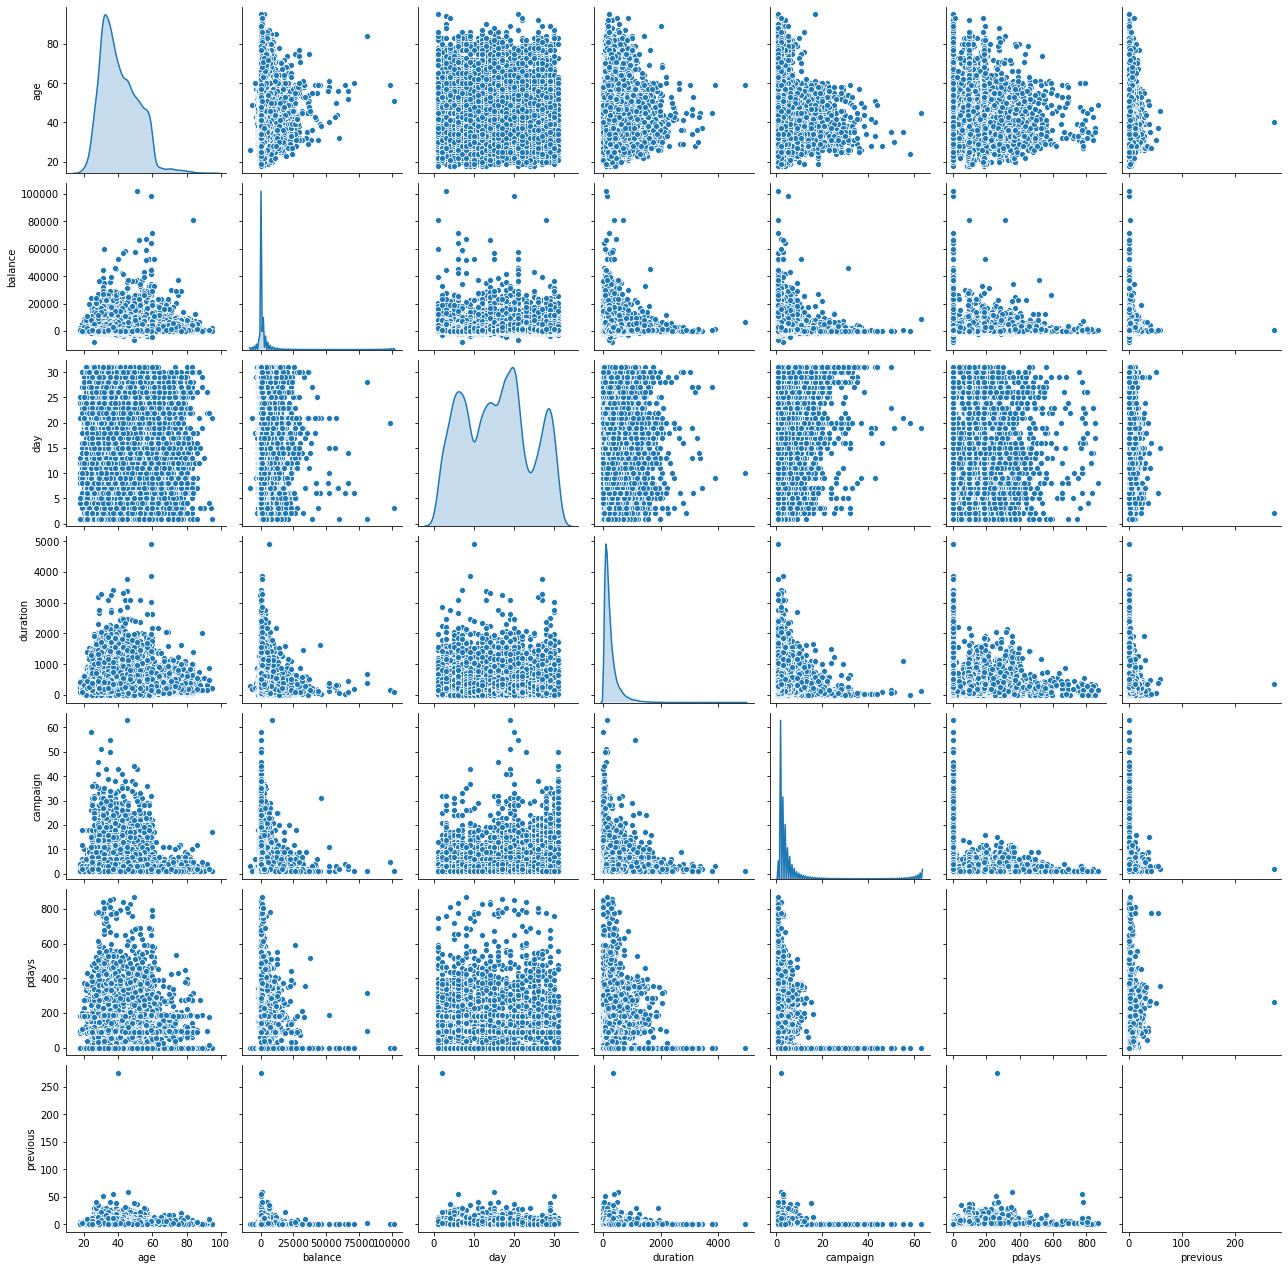

In [16]:
sns.pairplot(df,diag_kind='kde')
plt.show()

* Age is positively skewed
* Most of the customers balance is in between 72 to 1428'
* Last contact day of the month is well spread
* Most of the 'Last contact duration' is between 103 to 319 secs.
* Most of the 'Campaign' is between 0 to 3.
* Most of pdays is -1
* Most of previous is 0

## Bivariate Analysis

In [17]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [18]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Target"]).median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39,417,16,164,2,-1,0
yes,38,733,15,426,2,-1,0


no     88.30152
yes    11.69848
Name: Target, dtype: float64



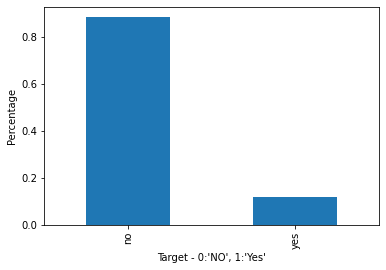

In [19]:
print(df['Target'].value_counts(normalize=True)*100)
print()
df['Target'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Target - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

In [20]:
pd.crosstab(df['Target'], df['job'],normalize='columns')
# Across the job types, most of the customers have not subscribed to the term deposit.
# student and retired customers have relatively have higher percentage of subscribtion to term deposit.

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
no,0.877973,0.92725,0.917283,0.912097,0.862444,0.772085,0.881571,0.91117,0.71322,0.88943,0.844973,0.881944
yes,0.122027,0.07275,0.082717,0.087903,0.137556,0.227915,0.118429,0.08883,0.28678,0.11057,0.155027,0.118056


In [21]:
pd.crosstab(df['Target'], df['marital'],normalize='columns')
# Across the marital status, most of the customers have not subscribed to the term deposit.
# customers with single marital status has very slightly higher percentage of subscribtion to term deposit.

marital,divorced,married,single
Target,,,
no,0.880545,0.898765,0.850508
yes,0.119455,0.101235,0.149492


In [22]:
pd.crosstab(df['Target'], df['education'],normalize='columns')
# Across the education types, most of the customers have not subscribed to the term deposit.
# customers with education has very slightly higher percentage of subscribtion to term deposit.

education,primary,secondary,tertiary,unknown
Target,,,,
no,0.913735,0.894406,0.849936,0.864297
yes,0.086265,0.105594,0.150064,0.135703


In [23]:
pd.crosstab(df['Target'], df['default'],normalize='columns')
# Across the default types, most of the customers have not subscribed to the term deposit.
# Non-default customers has slightly higher percentage of subscribtion to term deposit.

default,no,yes
Target,,
no,0.882039,0.936196
yes,0.117961,0.063804


In [24]:
pd.crosstab(df['Target'], df['housing'],normalize='columns')
# Across the housing loan types, most of the customers have not subscribed to the term deposit.
# Customers with no housing loan has slightly higher percentage of subscribtion to term deposit.

housing,no,yes
Target,,
no,0.832976,0.923
yes,0.167024,0.077


In [25]:
pd.crosstab(df['Target'], df['loan'],normalize='columns')
# Across the personal loan types, most of the customers have not subscribed to the term deposit.
# Customers with no personal loan has slightly higher percentage of subscribtion to term deposit.

loan,no,yes
Target,,
no,0.873443,0.933186
yes,0.126557,0.066814


In [26]:
pd.crosstab(df['Target'], df['month'],normalize='columns')
# Across the months, most of the customers have not subscribed to the term deposit. Only exception to this is mar month where 51% of customers have subscribed for term  deposit.
# Customers have higher percentage of subscribtion to term deposit in mar, sep, oct and dec months

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
no,0.803206,0.889867,0.53271,0.833522,0.898788,0.909065,0.897772,0.480084,0.932805,0.898489,0.562331,0.535406
yes,0.196794,0.110133,0.46729,0.166478,0.101212,0.090935,0.102228,0.519916,0.067195,0.101511,0.437669,0.464594


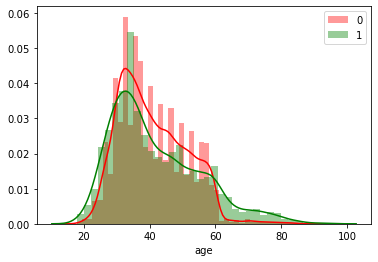

In [27]:
sns.distplot(df[df['Target']=='no']['age'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['age'],color='g',label=1)
plt.legend()
plt.show()

# Number of customers subscribing to term deposite is well distribited across different age.

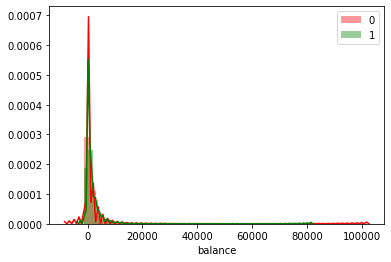

In [28]:
sns.distplot(df[df['Target']=='no']['balance'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['balance'],color='g',label=1)
plt.legend()
plt.show()
# There is no strong relation between balance and Target

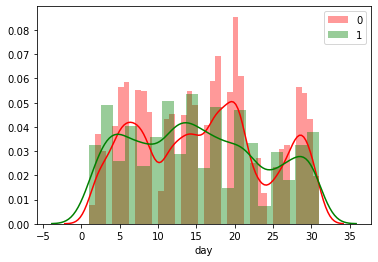

In [29]:
sns.distplot(df[df['Target']=='no']['day'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['day'],color='g',label=1)
plt.legend()
plt.show()

# Number of customers subscribing to term deposite is well distribited across different age.

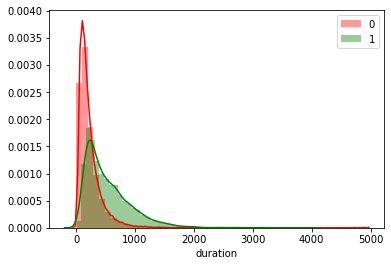

In [30]:
sns.distplot(df[df['Target']=='no']['duration'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['duration'],color='g',label=1)
plt.legend()
plt.show()

# There is no strong relation between duration and Target

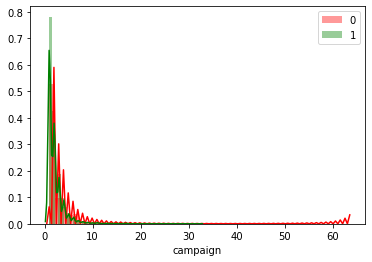

In [31]:
sns.distplot(df[df['Target']=='no']['campaign'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['campaign'],color='g',label=1)
plt.legend()
plt.show()

# There is no strong relation between campaign and Target

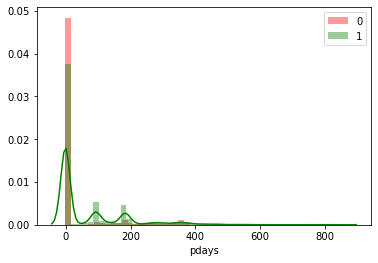

In [32]:
sns.distplot(df[df['Target']=='no']['pdays'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['pdays'],color='g',label=1)
plt.legend()
plt.show()

# There is no strong relation between pdays and Target

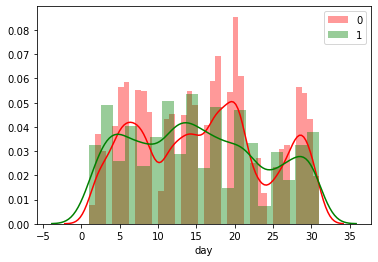

In [33]:
sns.distplot(df[df['Target']=='no']['day'],color='r',label=0)
sns.distplot(df[df['Target']=='yes']['day'],color='g',label=1)
plt.legend()
plt.show()

# There is no strong relation between day and Target

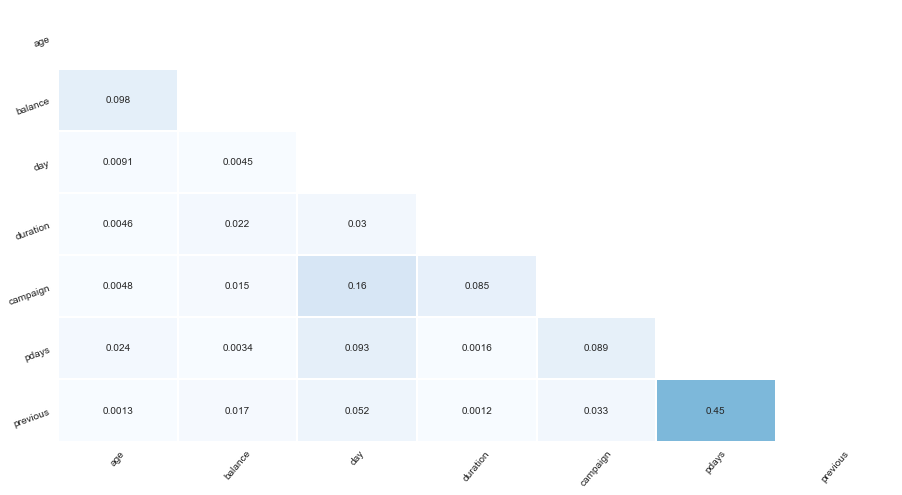

In [34]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`None of the attributes have high correlation, so not dropping any columns`

### Prepare the data for analysis

In [35]:
replaceStruct = {"Target": {"yes": 1, "no": 0 }}
df = df.replace(replaceStruct)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [36]:
# Separate the independent attributes i.e. every column except Target
# Store the target column (Target) into Y array

x = df.loc[:, df.columns != 'Target']  # independent variables

y = df.loc[:, df.columns == 'Target']  # Target variable

In [37]:
x = pd.get_dummies(x,drop_first=True)

In [38]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [39]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Use the Logistic Regression model to predict whether the customer will subscribe for term deposit. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score

In [40]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [41]:
xtrain.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
35272,39,4239,7,40,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10705,44,647,16,226,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
43536,46,429,26,465,2,369,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6960,55,81,28,172,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
41892,28,172,19,123,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
xtest.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
33177,36,349,20,365,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,33,177,8,75,4,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
44480,79,631,9,440,5,182,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17886,26,-42,30,305,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12505,30,0,2,95,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Base Model

In [43]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

In [44]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.8886466331721806

Testing accuracy 0.8943526983190799


In [45]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [46]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## importing necessary metrics to evaluate model performance

In [47]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

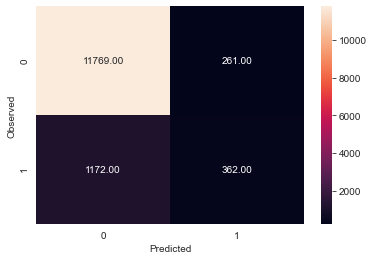

In [48]:
draw_cm(ytest,y_predict)

In [49]:
recall_score(ytest,y_predict)

0.23598435462842243

In [50]:
precision_score(ytest,y_predict)

0.5810593900481541

In [51]:
f1_score(ytest,y_predict)

0.33565136764024106

In [52]:
roc_auc_score(ytest,y_predict)

0.6071442970149593

### 5] Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [53]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round((model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,job_retired,0.21
37,month_oct,0.12
34,month_mar,0.11
38,month_sep,0.10
21,education_tertiary,0.06
26,contact_telephone,0.05
14,job_student,0.03
28,month_aug,0.03
29,month_dec,0.03
22,education_unknown,0.02


In [54]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Subscribtion Status'] = ytest
z['Predicted Subscribtion Status'] = y_predict
z[z['Observed Subscribtion Status']!=z['Predicted Subscribtion Status']]

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Observed Subscribtion Status,Predicted Subscribtion Status
43620,80,155,4,209,1,53,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
31232,30,523,3,83,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8442,40,-754,3,941,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8696,30,3107,3,1516,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
24100,34,1012,28,540,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,56,146,5,419,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23263,46,0,27,763,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43725,24,1,14,396,5,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
29999,40,6322,4,459,1,272,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Decision Tree ###

In [55]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [56]:
print(dTree.score(xtrain, ytrain))
print(dTree.score(xtest, ytest))

1.0
0.8727514007667355


In [57]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(xtrain, ytrain)
print(dTreeR.score(xtrain, ytrain))
print(dTreeR.score(xtest, ytest))

0.8875406831611211
0.8947213211442052


[Text(167.4, 190.26, 'X[3] <= 521.5\ngini = 0.209\nsamples = 31647\nvalue = [27892, 3755]'),
 Text(83.7, 135.9, 'X[5] <= 16.0\ngini = 0.145\nsamples = 28152\nvalue = [25937, 2215]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 60.5\ngini = 0.098\nsamples = 23073\nvalue = [21886, 1187]'),
 Text(20.925, 27.180000000000007, 'gini = 0.086\nsamples = 22623\nvalue = [21600, 1023]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.463\nsamples = 450\nvalue = [286, 164]'),
 Text(125.55000000000001, 81.53999999999999, 'X[24] <= 0.5\ngini = 0.323\nsamples = 5079\nvalue = [4051, 1028]'),
 Text(104.625, 27.180000000000007, 'gini = 0.474\nsamples = 1926\nvalue = [1183, 743]'),
 Text(146.475, 27.180000000000007, 'gini = 0.164\nsamples = 3153\nvalue = [2868, 285]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 807.5\ngini = 0.493\nsamples = 3495\nvalue = [1955, 1540]'),
 Text(209.25, 81.53999999999999, 'X[27] <= 0.5\ngini = 0.462\nsamples = 2167\nvalue = [1382, 785]'),
 Text(188.32500000000002, 27.

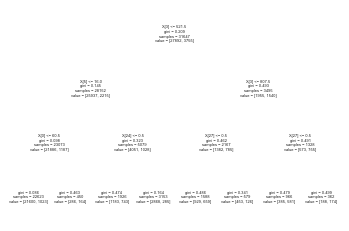

In [58]:
tree.plot_tree(dTreeR)

In [59]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = xtrain.columns))

                          Imp
age                  0.063610
balance              0.000000
day                  0.000000
duration             0.625787
campaign             0.000000
pdays                0.134199
previous             0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_married      0.000000
marital_single       0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
default_yes          0.000000
housing_yes          0.147586
loan_yes             0.000000
contact_telephone    0.000000
contact_unknown      0.028818
month_aug            0.000000
month_dec            0.000000
month_feb            0.000000
month_jan            0.000000
month_jul 

0.8947213211442052
0.8947213211442052


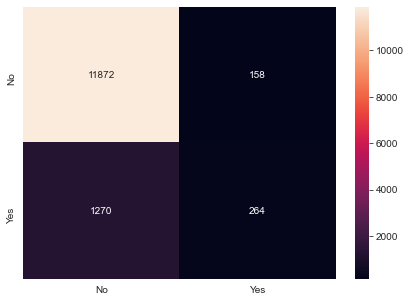

In [60]:
print(dTreeR.score(xtest , ytest))
ypredict = dTreeR.predict(xtest)

print(dTreeR.score(xtest , ytest))
ypredict = dTreeR.predict(xtest)

cm=metrics.confusion_matrix(ytest, ypredict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Models 

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

## Random forest model and print matrices

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(xtrain, ytrain)
test_pred = rfcl.predict(xtest)
rfcl_score = rfcl.score(xtest , ytest)
print(rfcl_score)

0.8871276909466234


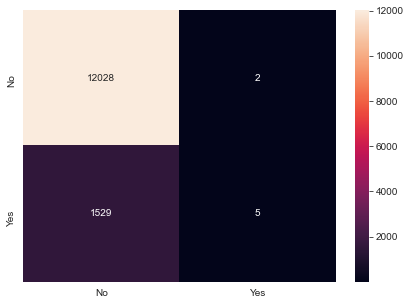

In [63]:
cm=metrics.confusion_matrix(ytest, test_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [64]:
rfcl_recall_score = recall_score(ytest,test_pred)
print(rfcl_recall_score)

0.003259452411994785


In [65]:
rfcl_precision_score = precision_score(ytest,test_pred)
print(rfcl_precision_score)

0.7142857142857143


In [66]:
rfcl_f1_score = f1_score(ytest,test_pred)
print(rfcl_f1_score)

0.006489292667099287


In [67]:
rfcl_roc_auc_score = roc_auc_score(ytest,test_pred)
print(rfcl_roc_auc_score)

0.501546600686463


## Adaboost Ensemble Algorithm for the same data and print matrices.

In [68]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(xtrain, ytrain)

test_pred = abcl.predict(xtest)
abcl_score = abcl.score(xtest , ytest)
print(abcl_score)

0.8964169861397818


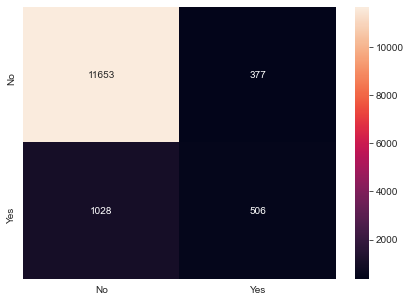

In [69]:
cm=metrics.confusion_matrix(ytest, test_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [70]:
abcl_recall_score = recall_score(ytest,test_pred)
print(abcl_recall_score)

0.32985658409387225


In [71]:
abcl_precision_score = precision_score(ytest,test_pred)
print(abcl_precision_score)

0.5730464326160816


In [72]:
abcl_f1_score = f1_score(ytest,test_pred)
print(abcl_precision_score)

0.5730464326160816


In [73]:
abcl_roc_auc_score = roc_auc_score(ytest,test_pred)
print(abcl_precision_score)

0.5730464326160816


## Bagging Classifier Algorithm and print matrices.

In [74]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=20, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(xtrain, ytrain)

In [75]:
test_pred = bgcl.predict(xtest)
bgcl_score = bgcl.score(xtest , ytest)

print(bgcl_score)

0.9006930109112357


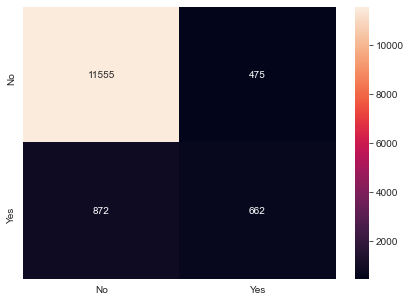

In [76]:
cm=metrics.confusion_matrix(ytest, test_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [77]:
bgcl_recall_score = recall_score(ytest,test_pred)
print(bgcl_recall_score)

0.4315514993481095


In [78]:
bgcl_precision_score = precision_score(ytest,test_pred)
print(bgcl_precision_score)

0.5822339489885664


In [79]:
bgcl_f1_score = f1_score(ytest,test_pred)
print(bgcl_f1_score)

0.4956944964432796


In [80]:
bgcl_roc_auc_score = roc_auc_score(ytest,test_pred)
print(bgcl_roc_auc_score)

0.6960334387846117


## GradientBoost Classifier Algorithm for the same data and print matrices

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(xtrain, ytrain)

In [82]:
test_pred = gbcl.predict(xtest)
gbcl_score = gbcl.score(xtest , ytest)
print(gbcl_score)

0.8968593335299322


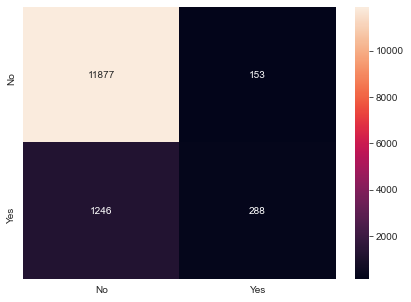

In [83]:
cm=metrics.confusion_matrix(ytest, test_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [84]:
gbcl_recall_score = recall_score(ytest,test_pred)
print(gbcl_recall_score)

0.1877444589308996


In [85]:
gbcl_precision_score = precision_score(ytest,test_pred)
print(gbcl_precision_score)

0.6530612244897959


In [86]:
gbcl_f1_score = f1_score(ytest,test_pred)
print(gbcl_f1_score)

0.2916455696202532


In [87]:
gbcl_roc_auc_score = roc_auc_score(ytest,test_pred)
print(gbcl_roc_auc_score)

0.5875131272210607


## Compare Ensemble Models

In [88]:
matrixCompareDf = pd.DataFrame({'Random Forest': [rfcl_score, rfcl_recall_score, rfcl_precision_score, rfcl_f1_score, rfcl_roc_auc_score ],
                                'AdaBoost': [abcl_score, abcl_recall_score, abcl_precision_score, abcl_f1_score, abcl_roc_auc_score], 
                                'Bagging': [bgcl_score, bgcl_recall_score, bgcl_precision_score, bgcl_f1_score, bgcl_roc_auc_score], 
                                'Gradient': [gbcl_score, gbcl_recall_score, gbcl_precision_score, gbcl_f1_score, gbcl_roc_auc_score]}, index=['Accuracy', 'Recall', 'Precision', 'F1_Score', 'ROC_AU_Score'])

In [89]:
matrixCompareDf
#Accuracy for all 4 algorithm is pretty close with Bagging have a very slight edge.
#Here the bank wants to target people who would subscribe for term deposit i.e. more number of True Positive and less number of False Negative. Hence Recall is the important metric.
#out of 4 algorithms used, Bagging has highest Recall and accuracy and Bagging is best fit algorithm.

,Random Forest,AdaBoost,Bagging,Gradient
Accuracy,0.887128,0.896417,0.900693,0.896859
Recall,0.003259,0.329857,0.431551,0.187744
Precision,0.714286,0.573046,0.582234,0.653061
F1_Score,0.006489,0.418701,0.495694,0.291646
ROC_AU_Score,0.501547,0.649259,0.696033,0.587513
